In [239]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [240]:
data = pd.read_csv('D:/Yogabar/Solution/data/review_text_data.csv')

In [241]:
data.head()

,reviews
0,\r\n\r\n It's very tasty and affordable and filled with all the goodies needed for your diet\r\n\r\n
1,"\r\n\r\n I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!\r\n\r\n"
2,"\r\n\r\n Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try.\r\n\r\n"
3,"\r\n\r\n I'm a big fan of Yogabar range of Mueslis and order them frequently. I decided to buy the 700 gm super saver pack when it was cheaper during the great Indian sale. Got it for Rs 349. However, the pack was full of lumps rather than the usual consistency. It was really annoying as it altered the taste a lot. All the lumps were overtly sweet and rest of the muesli was dry and tasteless. Moreover, they didn't dissolve in milk and by the time it did, the rest of the cereal got soggy. I really hope it was a one time thing and won't happen again in the future. I'm still waiting to hear from Yogabars.Hope this review is helpful.\r\n\r\n"
4,"\r\n\r\n Quality of product has deteriorated badly. The two boxes I purchased got ""burnt grains"". Also some of the seeds float when milk is put, meaning the company is now using expired items. Even the rasins are put like lump of balls...Only thing that is good is the packing... not the actual product.Anyway, this company planned that they will initially gain customer confidence, get good rating and later give 3rd class product.Very disappointing...\r\n\r\n"


In [242]:
df = data.copy()
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [243]:
df.size

869

In [244]:
df.drop_duplicates(subset = "reviews", keep = False, inplace = True) 

In [245]:
df.size

770

In [246]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [247]:
import string   
import re

In [248]:
def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['reviews_punct'] = df['reviews'].apply(lambda x: remove_punct_emoji(x))

In [249]:
def tokenize(text):
    text = re.split('\W+', text)
    return text

df['reviews_tokenized'] = df['reviews_punct'].apply(lambda x: tokenize(x.lower()))

In [250]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['reviews_nonstop'] = df['reviews_tokenized'].apply(lambda x: remove_stopwords(x))

In [251]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['reviews_stemmed'] = df['reviews_nonstop'].apply(lambda x: stemming(x))

In [252]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed
686,Very nice product and good for health.,Very nice product and good for health,"[, very, nice, product, and, good, for, health]","[, nice, product, good, health]","[, nice, product, good, health]"
479,received package in good condition within a week thank you amazon..,received package in good condition within a week thank you amazon,"[, received, package, in, good, condition, within, a, week, thank, you, amazon]","[, received, package, good, condition, within, week, thank, amazon]","[, receiv, packag, good, condit, within, week, thank, amazon]"
523,"Quality, package and taste. All tick boxes checked.",Quality package and taste All tick boxes checked,"[, quality, package, and, taste, all, tick, boxes, checked]","[, quality, package, taste, tick, boxes, checked]","[, qualiti, packag, tast, tick, box, check]"
596,Super quality and taste as well,Super quality and taste as well,"[, super, quality, and, taste, as, well]","[, super, quality, taste, well]","[, super, qualiti, tast, well]"
60,"The product is best for my morning brkfast and pre/post workout. The taste is just fine, with the sweetness coming from natural ingredients. It makes a good rich in fibre, protien and carbs all in one snack. Hope it makes. Delivery by Amazon was on time.",The product is best for my morning brkfast and prepost workout The taste is just fine with the sweetness coming from natural ingredients It makes a good rich in fibre protien and carbs all in one snack Hope it makes Delivery by Amazon was on time,"[, the, product, is, best, for, my, morning, brkfast, and, prepost, workout, the, taste, is, just, fine, with, the, sweetness, coming, from, natural, ingredients, it, makes, a, good, rich, in, fibre, protien, and, carbs, all, in, one, snack, hope, it, makes, delivery, by, amazon, was, on, time]","[, product, best, morning, brkfast, prepost, workout, taste, fine, sweetness, coming, natural, ingredients, makes, good, rich, fibre, protien, carbs, one, snack, hope, makes, delivery, amazon, time]","[, product, best, morn, brkfast, prepost, workout, tast, fine, sweet, come, natur, ingredi, make, good, rich, fibr, protien, carb, one, snack, hope, make, deliveri, amazon, time]"
236,The product is filled with fruits and is a good value for money. If you like it sweeter then you could add some honey to enhance the flavours.,The product is filled with fruits and is a good value for money If you like it sweeter then you could add some honey to enhance the flavours,"[, the, product, is, filled, with, fruits, and, is, a, good, value, for, money, if, you, like, it, sweeter, then, you, could, add, some, honey, to, enhance, the, flavours]","[, product, filled, fruits, good, value, money, like, sweeter, could, add, honey, enhance, flavours]","[, product, fill, fruit, good, valu, money, like, sweeter, could, add, honey, enhanc, flavour]"
72,"The product is good, nice flavor and priced a bit on higher side. The only thing which needs to be addressed is the amount of sugar inside the museli.If it can be removed completely, the product will certainly get 5 Stars from me.",The product is good nice flavor and priced a bit on higher side The only thing which needs to be addressed is the amount of sugar inside the museliIf it can be removed completely the product will certainly get Stars from me,"[, the, product, is, good, nice, flavor, and, priced, a, bit, on, higher, side, the, only, thing, which, needs, to, be, addressed, is, the, amount, of, sugar, inside, the, museliif, it, can, be, removed, completely, the, product, will, certainly, get, stars, from, me]","[, product, good, nice, flavor, priced, bit, higher, side, thing, needs, addressed, amount, sugar, inside, museliif, removed, completely, product, certainly, get, stars]","[, product, good, nice, flavor, price, bit, higher, side, thing, need, address, amount, sugar, insid, museliif, remov, complet, product, certainli, get, star]"
814,"After tryin

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [255]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [256]:
def compound_score(text):
    comp = sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [257]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [258]:
df['sentiment_score'] = df['reviews'].apply(lambda x:compound_score(x))

In [259]:
df['review_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [260]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,sentiment_score,review_category
688,"Nice product, good for health,",Nice product good for health,"[, nice, product, good, for, health]","[, nice, product, good, health]","[, nice, product, good, health]",0.6908,positive
740,Best one,Best one,"[, best, one]","[, best, one]","[, best, one]",0.6369,positive
670,Very good. Value for money,Very good Value for money,"[, very, good, value, for, money]","[, good, value, money]","[, good, valu, money]",0.7070,positive
480,Healthy plus tasty worth it,Healthy plus tasty worth it,"[, healthy, plus, tasty, worth, it]","[, healthy, plus, tasty, worth]","[, healthi, plu, tasti, worth]",0.5574,positive
600,Tasty but costly,Tasty but costly,"[, tasty, but, costly]","[, tasty, costly]","[, tasti, costli]",-0.1531,negative
136,"I have been a regular consumer of cerals over the past few years and have tasted quite a few. Viz. Dorset, kellogs muesli etc. Yoga is quite a healthy mix of seeds, oats fruits and overall likeable to the Indian palate. Would wish for a higher portion of fruit. Would rate it 4 stars over the other Indian cereals available.",I have been a regular consumer of cerals over the past few years and have tasted quite a few Viz Dorset kellogs muesli etc Yoga is quite a healthy mix of seeds oats fruits and overall likeable to the Indian palate Would wish for a higher portion of fruit Would rate it stars over the other Indian cereals available,"[, i, have, been, a, regular, consumer, of, cerals, over, the, past, few, years, and, have, tasted, quite, a, few, viz, dorset, kellogs, muesli, etc, yoga, is, quite, a, healthy, mix, of, seeds, oats, fruits, and, overall, likeable, to, the, indian, palate, would, wish, for, a, higher, portion, of, fruit, would, rate, it, stars, over, the, other, indian, cereals, available]","[, regular, consumer, cerals, past, years, tasted, quite, viz, dorset, kellogs, muesli, etc, yoga, quite, healthy, mix, seeds, oats, fruits, overall, likeable, indian, palate, would, wish, higher, portion, fruit, would, rate, stars, indian, cereals, available]","[, regular, consum, ceral, past, year, tast, quit, viz, dorset, kellog, muesli, etc, yoga, quit, healthi, mix, seed, oat, fruit, overal, likeabl, indian, palat, would, wish, higher, portion, fruit, would, rate, star, indian, cereal, avail]",0.8261,positive
368,"I won't buy again.. Ingredients are not up to the mark.. Taste & Flavor doesn't has standard.. In this price, we can't expect premium quality..",I wont buy again Ingredients are not up to the mark Taste Flavor doesnt has standard In this price we cant expect premium quality,"[, i, wont, buy, again, ingredients, are, not, up, to, the, mark, taste, flavor, doesnt, has, standard, in, this, price, we, cant, expect, premium, quality]","[, wont, buy, ingredients, mark, taste, flavor, doesnt, standard, price, cant, expect, premium, quality]","[, wont, buy, ingredi, mark, tast, flavor, doesnt, standard, price, cant, expect, premium, qualiti]",0.0000,neutral
98,The flavour is just mind blowing the moment I opened the pack it was like strawberry milkshake then I treid eating barely n omg it's just awesome u have chia n flax seeds my fav n healthy just best brkfast also many things rich in protein as whoever work-out,The flavour is just mind blowing the moment I opened the pack it was like strawberry milkshake then I treid eating barely n omg its just awesome u have chia n flax seeds my fav n healthy just best brkfast also many things rich in protein as whoever workout,"[, the, flavour, is, just, mind, blowing, the, moment, i, opened, the, pack, it, was, like, strawberry, milkshake, then, i, treid, eating, barely, n, omg, its, just, awesome, u, have, chia, n, flax, seeds, my, fav, n, healthy, just, best, brkfast, also, many, things, rich, in, protein, as, whoever, workout]","[, flavour, mind, blowing, moment, opened, pack, like, strawberry, milkshake, treid, eating, barely, n, omg, awesome, u, 

(-0.5, 399.5, 199.5, -0.5)

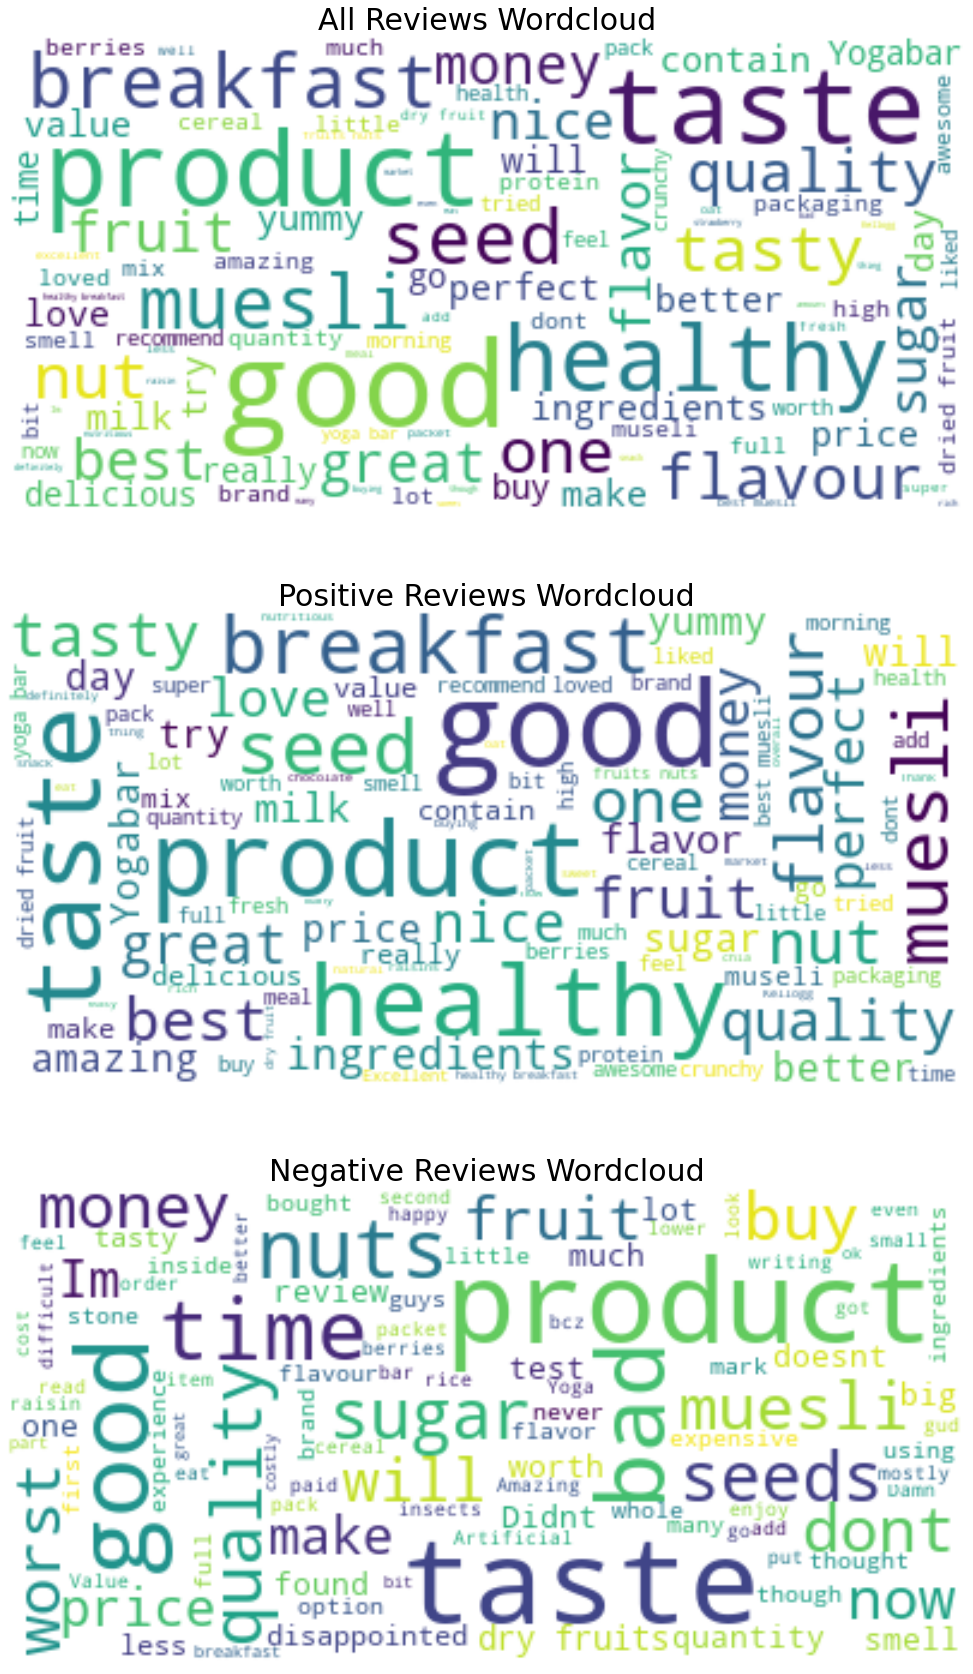

In [261]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Split reviews dataframe (df) to according to positive and negative class
df_positive = df[df['review_category']=='positive']
df_negative = df[df['review_category']=='negative']

# Create Wordcloud strings
reviews_all = " ".join(review for review in df.reviews_punct)
reviews_positive = " ".join(review for review in df_positive.reviews_punct)
reviews_negative = " ".join(review for review in df_negative.reviews_punct)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))

# Generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_all)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_negative)

# Display the generated wordcloud images:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Reviews Wordcloud', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Reviews Wordcloud',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Reviews Wordcloud',fontsize=30)
ax[2].axis('off')

Text(0.5, 1.0, 'Distribution of Reviews Category')

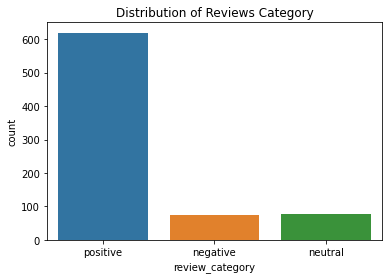

In [262]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")